## Phase 2 (Data Understanding): Korrelationsanalyse

* Autorin: Anna (i3-Versicherung)
* Webseite: [Data Science Training - Kapitel 2](https://data-science.training/kapitel-2/)
* Datum: 23.03.2023

Wir analysieren nun die numerischen Attribute und betrachten paarweise lineare Korrelationen zwischen diesen.

In [4]:
# Pandas Paket (Package) importieren
#  Datenstrukturen und Datenanalyse, I/O
#  https://pandas.pydata.org/pandas-docs/stable/
import pandas as pd
# NumPy Paket (Package) importieren
#  Mehrdimensionale Datenstrukturen (Vektoren, Matrizen, Tensoren, Arrays), Lineare Algebra
#  https://numpy.org/doc/
import numpy as np
# Pyplot Modul der Matplot Bibliothek (Library) importieren
#  Mathematische grafische Daten-Visualisierungen
#  https://matplotlib.org/contents.html
import matplotlib.pyplot as plt

In [5]:
# Trainings- und Testdaten als Pandas Data Frame (df) aus CSV-Dateien laden
#  (KNIME: "CSV Reader")
df_train = pd.read_csv('../../data/titanic/original/train.csv')
df_test  = pd.read_csv('../../data/titanic/original/test.csv')

In [6]:
# Datentypen automatisch konvertieren
df_train = df_train.convert_dtypes()
df_test  = df_test.convert_dtypes()

In [7]:
# Korrelationsmatrix mit den linearen Korrelationskoeffizienten nach Pearson und Bravais
#  (KNIME: "Linear Correlation")
def dst_correlation_matrix(df):
    # Nur numerische Attribute auswählen
    df1 = df.select_dtypes(include=[np.number])
    # Korrelationsmatrix berechnen
    corr_matrix = df1.corr(method='pearson')
    # Rückgabe
    return corr_matrix

In [8]:
# Heatmap mit Korrelationskoeffizienten anzeigen
#  (KNIME: "Linear Correlation")
def dst_correlation_heatmap(corr_matrix):
    # Labels
    labels = corr_matrix.keys()
    # Größe der Grafik festlegen
    plt.figure(figsize=(8,6))
    # Korrelationsmaxtrix mit Farbpalette "Blues" anzeigen
    plt.matshow(corr_matrix, cmap='Blues', fignum=1, aspect='auto')
    # Ticks mit Beschriftungen, X-Labels um 45 Grad gedreht 
    plt.xticks(range(len(labels)), labels, rotation=45)
    plt.yticks(range(len(labels)), labels)
    # Farbskala anzeigen
    plt.colorbar()
    # Grafik ausgeben
    plt.show()

In [9]:
# (Starke) Korrelationskoeffizienten berechnen
#  (KNIME: "Linear Correlation", "Correlation Filter")
def dst_correlation_measures_filtered(corr_matrix, treshold=0.75):
    # Absolute Werte
    corr_matrix = corr_matrix.abs()
    # Diagonale löschen (Nullwerte)
    corr_matrix[corr_matrix == 1] = 0
    # Dreispaltige Tabelle erstellen: Attribut 1, Attribut 2, Koeffizient
    corr_measures = corr_matrix.unstack()
    # Duplikate entfernen
    corr_measures = corr_measures.drop_duplicates()
    # Filer anwenden
    corr_measures = corr_measures[corr_measures > treshold]
    # Absteigende Sortierung
    corr_measures = corr_measures.sort_values(ascending=False)
    # Kleine Matrix erstellen
    #corr_measures = corr_measures.unstack()
    # Rückgabe
    return corr_measures

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


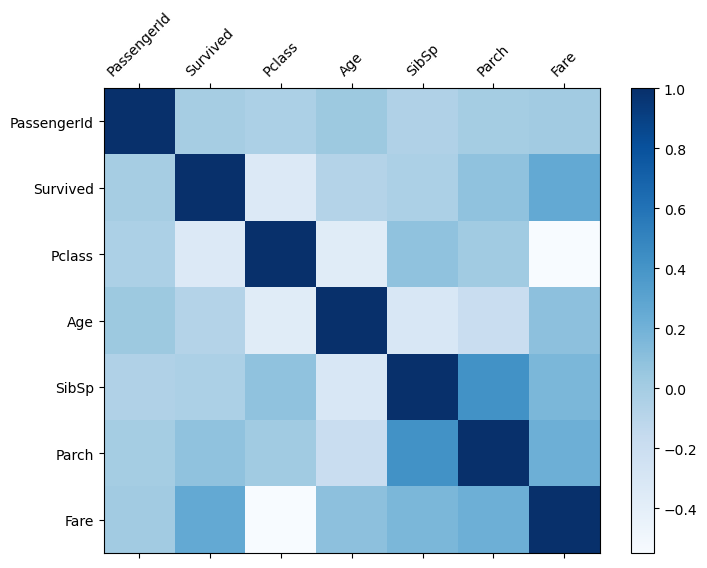

(Starke) Korrelationen (ohne Vorzeichen)


Pclass  Fare    0.5495
dtype: float64

In [10]:
# Korrelationsmatrix der Trainingsdaten berechnen und anzeigen
corr_matrix = dst_correlation_matrix(df_train)
display(corr_matrix)
# Korrelationsheatmap der Trainingsdaten anzeigen
dst_correlation_heatmap(corr_matrix)
# (Starke) Korrelationskoeffizienten berechnen und anzeigen
print('(Starke) Korrelationen (ohne Vorzeichen)')
corr_measures = dst_correlation_measures_filtered(corr_matrix, 0.5)
display(corr_measures)

### Ergebnisse der Korrelationsanalyse der 891 Trainingsdatensätze

Zwischen den Attributen gibt es keine sehr starken Korrelationen.

Korrelationen mit dem Klassenattribut Survived:
* Pclass zeigt die höchste Korrelation: -0,338
   (Negative Korrelation: Passagiere der ersten Klasse haben höhere Überlebenswahrscheinlichkeiten als die der zweiten oder dritten Klasse.)
* Fare zeigt die zweithöchste Korrelation: +0,257
   (Positive Korrelation: Mit steigendem Ticketpreis steigt auch die Überlebenswahrscheinlichkeit.)

Korrelationen der anderen Attribute untereinander:
* Pclass und Fare: -0,549
   (Je besser die Klasse, desto teurer das Ticket. Die erste Klasse ist teurer als die zweite und dritte Klasse.)
* Sibsp und Parch: +0,415
   (Wenn bereits Ehepartner und/oder Geschwister mitreisen, dann sind oft auch Eltern und/oder Kinder mit dabei - und umgekehrt.)
* Pclass und Age: -0,369
   (Je älter der Passagier, desto besser die Klasse. Ältere Passagiere sind vermögender und/oder möchten komfortabler reisen.)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.034102,0.003818,0.043080,0.008211
Pclass,-0.026751,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,-0.577147,0.337932,0.171539,0.230046,1.000000


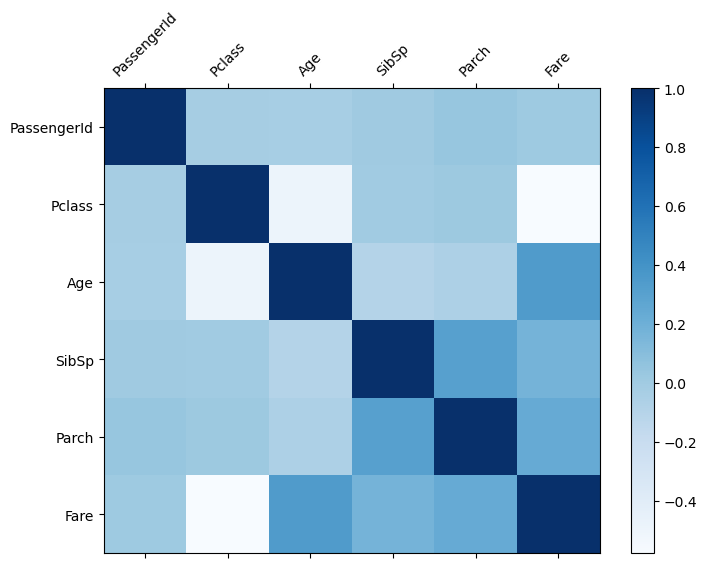

(Starke) Korrelationen (ohne Vorzeichen)


Pclass  Fare    0.577147
dtype: float64

In [12]:
# Korrelationsmatrix der Testdaten berechnen und anzeigen
corr_matrix = dst_correlation_matrix(df_test)
display(corr_matrix)
# Korrelationsheatmap der Testdaten anzeigen
dst_correlation_heatmap(corr_matrix)
# (Starke) Korrelationskoeffizienten der Testdaten berechnen und anzeigen
print('(Starke) Korrelationen (ohne Vorzeichen)')
corr_measures = dst_correlation_measures_filtered(corr_matrix, 0.5)
display(corr_measures)

### Ergebnisse der Korrelationsanalyse der 418 Testdatensätze

Überprüfung, ob ähnliche Korrelationen der Attribute untereinander vorliegen wie in den Trainingsdaten (s.o.):
* Pclass und Fare: -0,577 (Vergleich: -0,549)
* Sibsp und Parch: +0,307 (Vergleich +0,415)
* Pclass und Age: -0,492 (Vergleich -0,369)

Ergebnisse:
* Der Zusammenhang zwischen der Passagierklasse und dem Ticketpreis ist ähnlich.
* Der Zusammenhang zwischen der Anzahl von Mitreisenden verschiedener Generationen ist in den Testdaten schwächer ausgeprägt als in den Trainingsdaten.
* Der Zusammenhang zwischen der Passagierklasse und dem Alter ist in den Testdaten stärker ausgeprägt als in den Trainingsdaten.